###Use Open Source Data Set for Wine Quality Test. We will use features available to classify the Wine dataset based on similaity and then use the result to predict the quality of any new Wine.


### Red wine quality and style are highly influenced by the qualitative and quantitative composition of aromatic compounds having various chemical structures and properties and their interaction within different red wine matrices. The understanding of interactions between the wine matrix and volatile compounds and the impact on the overall flavor as well as on typical or specific aromas is getting more and more important for the creation of certain wine styles.
Source: https://www.sciencedirect.com/topics/food-science/wine-quality


### The goal is to help the consumer and the producer to understand what combination of features and of what quantity will enable to be called a qualifier for a good quality wine.

### Data Source: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [47]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import pandas_profiling as pp
%matplotlib inline

In [63]:
# Load the Red Wines dataset
RWdata = pd.read_csv("C:\PythonLearning\projects\Metis\winequality-red.csv", sep=';')

In [49]:
# Let us check the data
RWdata.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis

In [8]:
# Shape of Data Frame
RWdata.shape

(1599, 12)

In [10]:
#Basic Info on Data Frame
RWdata.info()
# None are string or object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#Check for any nulls
RWdata.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [64]:
# Basic Statistical data for each column
RWdata.describe()
#Citric Acid has a min value of 0
#Citric acid is generally found in very small quantities in wine grapes. It acts as a preservative and is added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. Excess addition, however, can ruin the taste.
# So it is quite possible.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


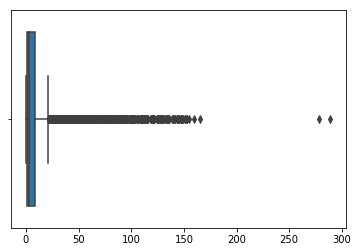

In [20]:
#Check for Outliers
sns.boxplot(x=RWdata)

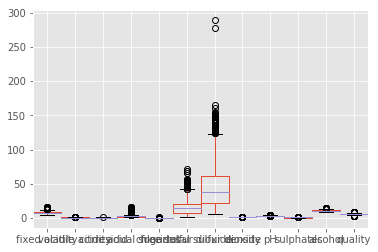

In [32]:
matplotlib.style.use('ggplot')
RWdata.boxplot( widths=1.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197C79A12E8>,
      dtype=object)

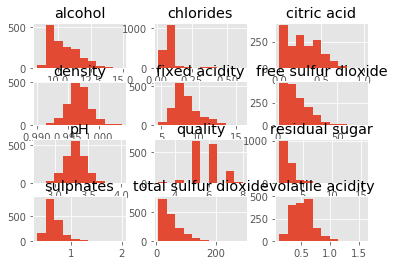

In [36]:
RWdata.hist()

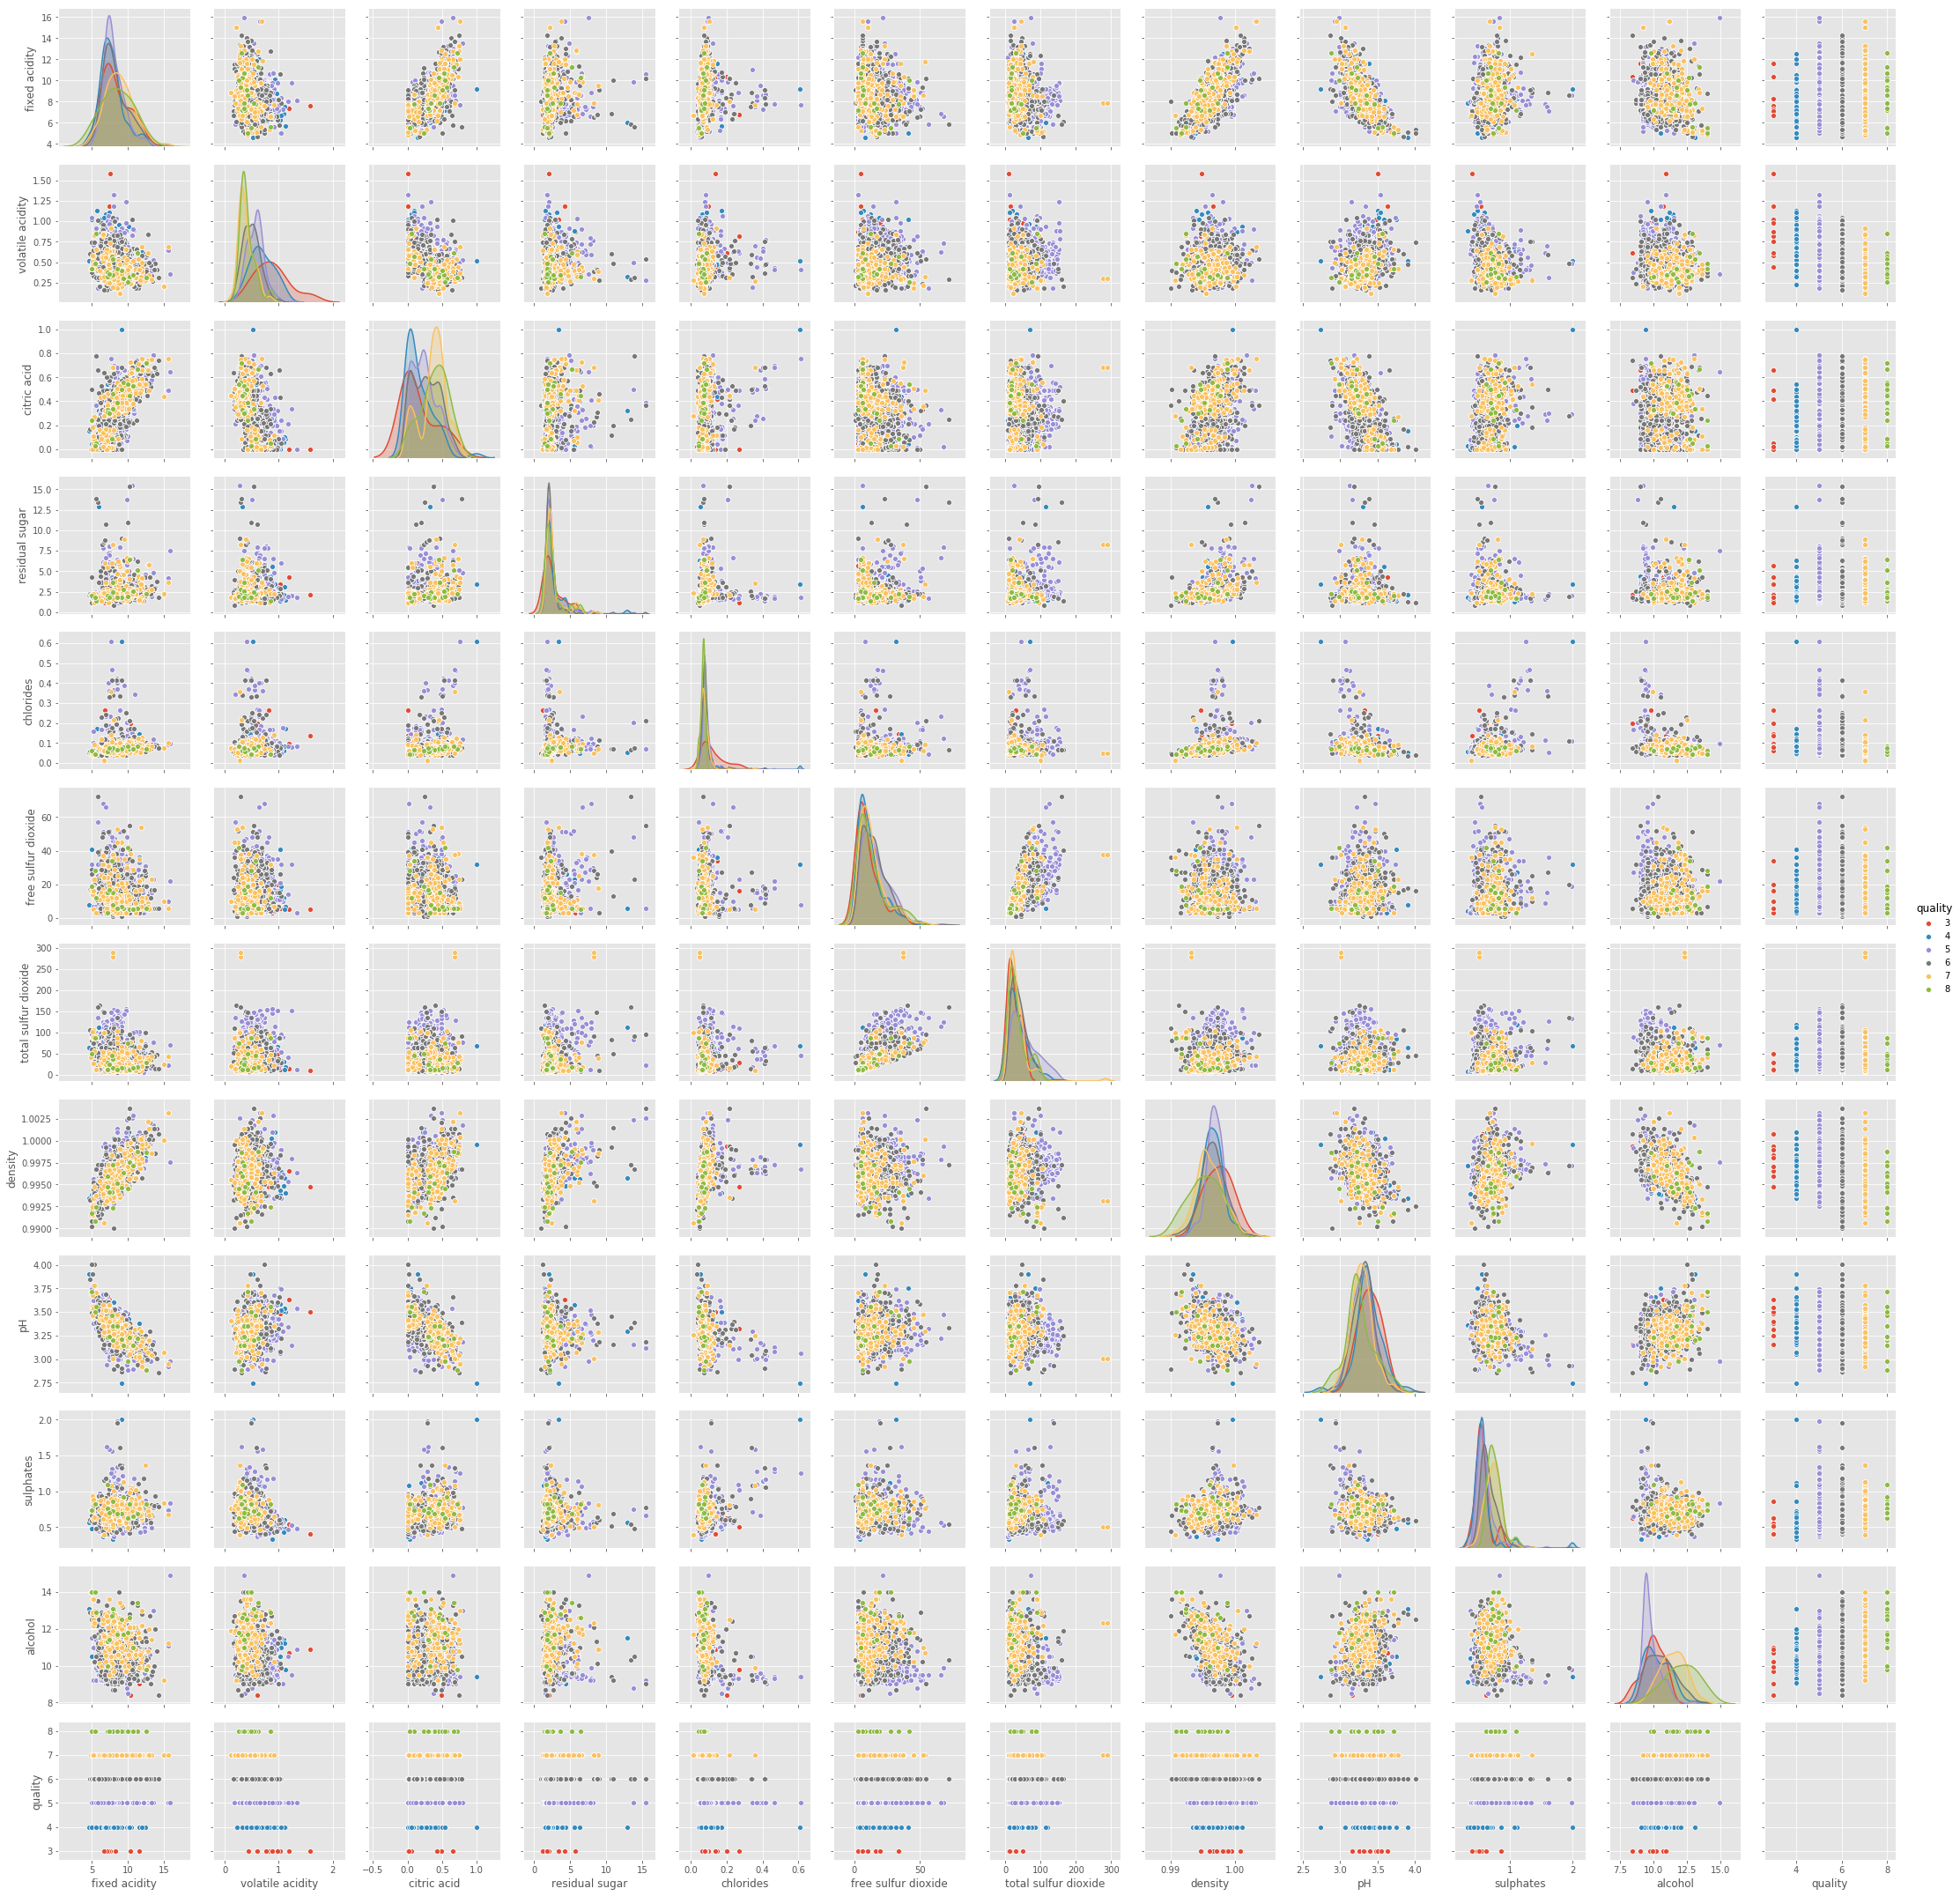

In [51]:
sns.pairplot(RWdata, hue = 'quality')

### We should convert Quality to a categorical value. We can use bins.

In [71]:
bins = [0,5,6, np.inf]
names = [1,2,3]
RWdatan=RWdata
RWdatan['Quality Value'] = pd.cut(RWdata['quality'], bins, labels=names)

In [72]:
 RWdatan

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality Value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,3
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,3
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,1


In [73]:
RWdatan=RWdatan.drop('quality',axis=1)

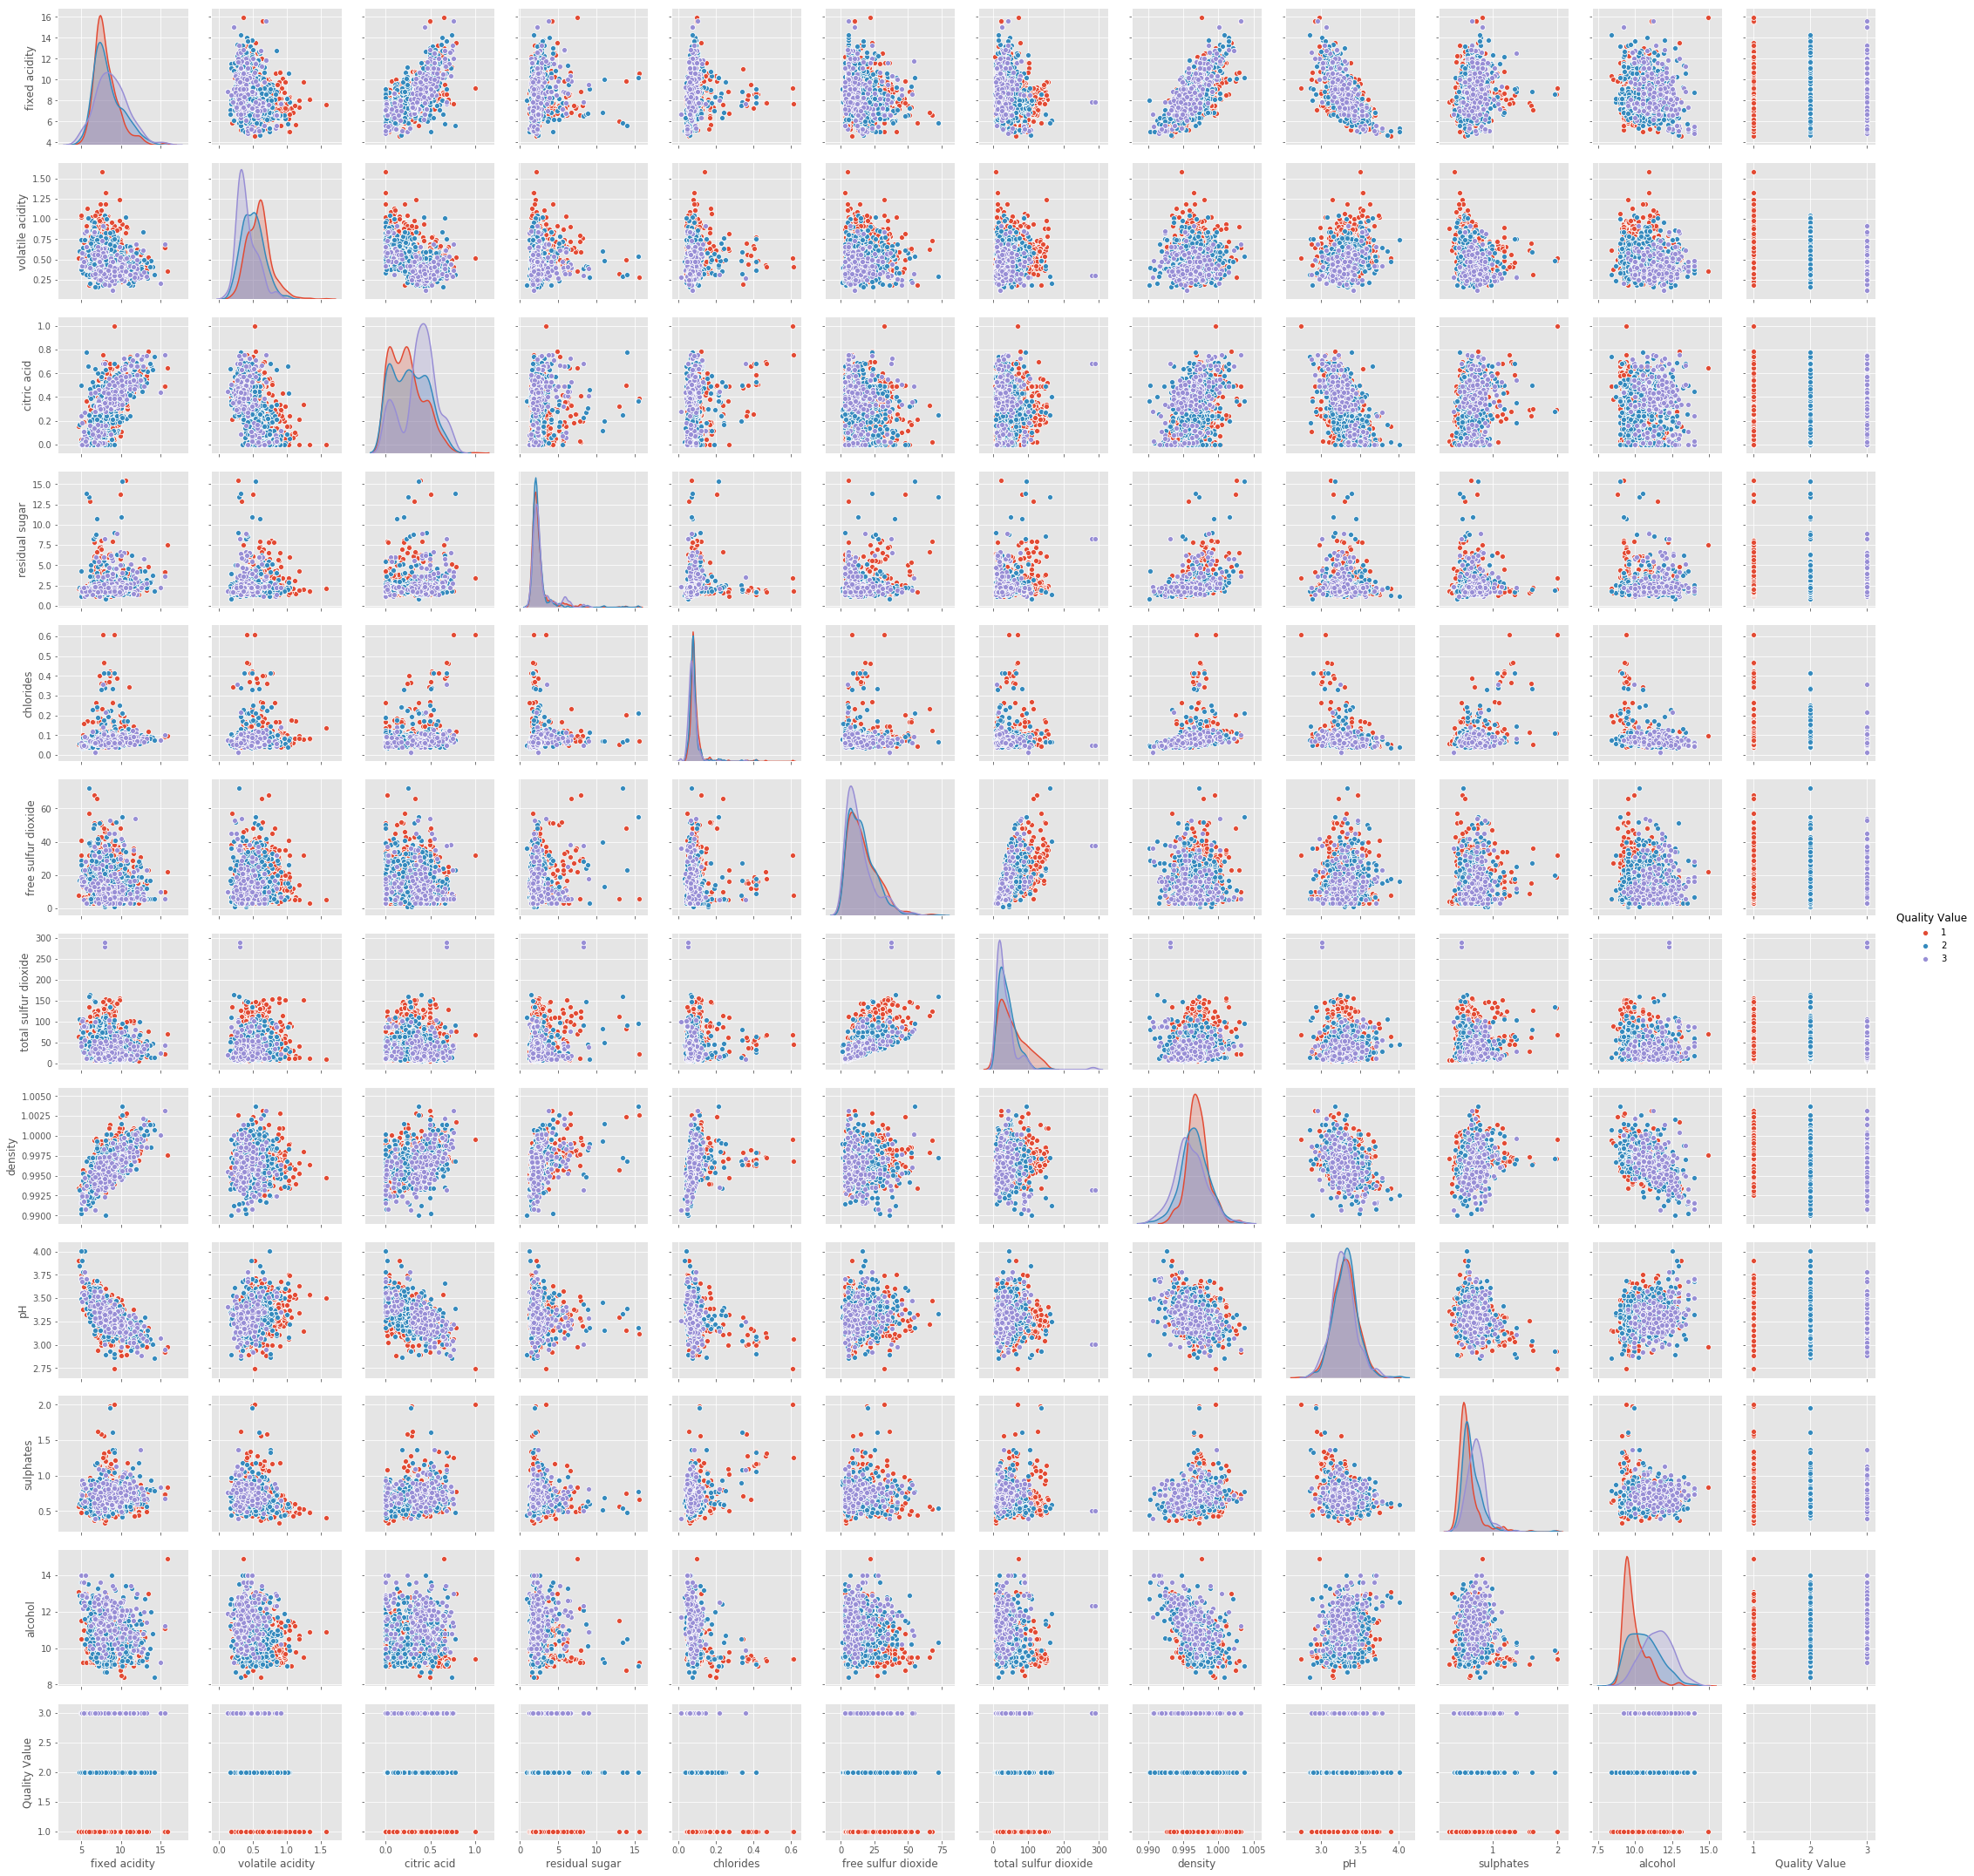

In [74]:
sns.pairplot(RWdatan, hue = 'Quality Value')